In [1]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import ast
from collections import Counter

In [2]:
path = r'C:\Users\HP\Anaconda Scripts\My Course\Personal Projects\Exploratory Data Analysis of Movie Trends'

prepared_data_path = os.path.join(path, '02 Data', 'Prepared Data', 'movies_data.csv')
movies_data_clean = pd.read_csv(prepared_data_path)

In [3]:
# Convert source columns ('crew' and 'cast') back from string to list objects
movies_data_clean['crew'] = movies_data_clean['crew'].apply(
    # Check if the value is a non-null string before trying to evaluate it
    lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x
)
movies_data_clean['cast'] = movies_data_clean['cast'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x
)

In [4]:
# Helper function to get the director
def get_director(crew):
    if isinstance(crew, list):
        for member in crew:
            if member.get('job') == 'Director':
                return member.get('name')
    return None

In [5]:
# Helper function to get main actors (top 5)
def get_main_actors(cast):
    if isinstance(cast, list):
        # Retrieve up to the first 5 actor names
        return [actor.get('name') for actor in cast[:5] if actor.get('name')] 
    return []

In [6]:
# 2. Re-apply the extraction to create the derived columns
movies_data_clean['director'] = movies_data_clean['crew'].apply(get_director)
movies_data_clean['main_actors'] = movies_data_clean['cast'].apply(get_main_actors)

In [7]:
print(movies_data_clean['director'])

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
3224          Kevin Smith
3225          John Waters
3226     Kiyoshi Kurosawa
3227        Shane Carruth
3228     Robert Rodriguez
Name: director, Length: 3229, dtype: object


In [8]:
print(movies_data_clean['main_actors'])

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
3224    [Brian O'Halloran, Jeff Anderson, Jason Mewes,...
3225    [Divine, David Lochary, Mary Vivian Pearce, Mi...
3226    [Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki...
3227    [Shane Carruth, David Sullivan, Casey Gooden, ...
3228    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
Name: main_actors, Length: 3229, dtype: object


## 1. Top 10 directors by average revenue

In [9]:
movies_data_clean['main_actors'] = movies_data_clean['main_actors'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [10]:
# Group by director and aggregate mean revenue, mean rating, and movie count
director_stats = movies_data_clean.groupby('director').agg({
    'revenue': 'mean',
    'vote_average': 'mean',
    'original_title': 'count'
}).rename(columns={'original_title': 'movie_count'})

In [11]:
top_directors = director_stats[director_stats['movie_count'] >= 3].nlargest(10, 'revenue')

C:\Users\HP\AppData\Local\Temp\ipykernel_12452\424787883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


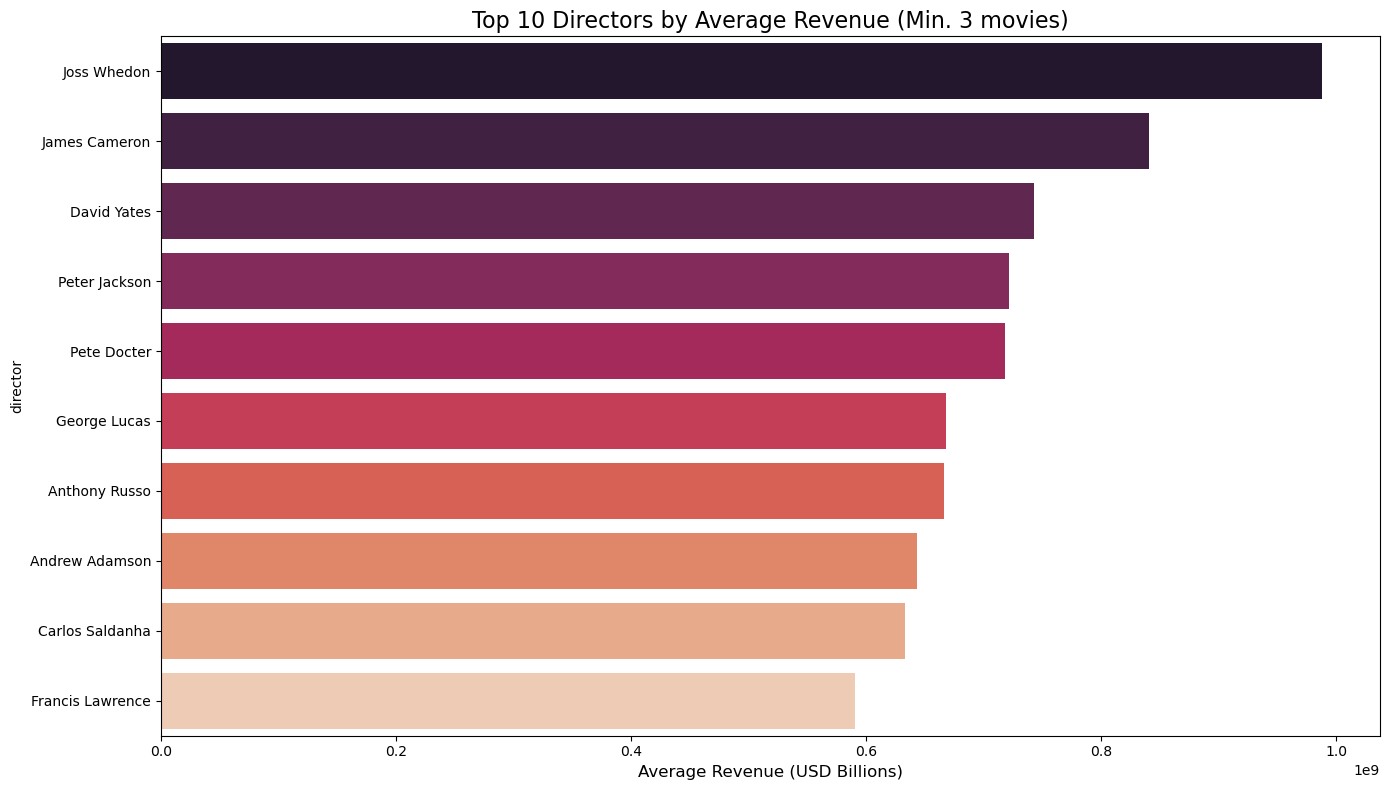

In [12]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_directors.reset_index(), 
    x='revenue', 
    y='director',
    palette='rocket')
plt.title("Top 10 Directors by Average Revenue (Min. 3 movies)", fontsize=16)
plt.xlabel("Average Revenue (USD Billions)", fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
# Top actors analysis (appearing in main cast)
all_actors = [actor for sublist in movies_data_clean['main_actors'] for actor in sublist]
actor_counts = Counter(all_actors)
top_actors = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Movie_Count']).nlargest(10, 'Movie_Count')

C:\Users\HP\AppData\Local\Temp\ipykernel_12452\324291693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_actors, x='Movie_Count', y='Actor', palette='rocket')


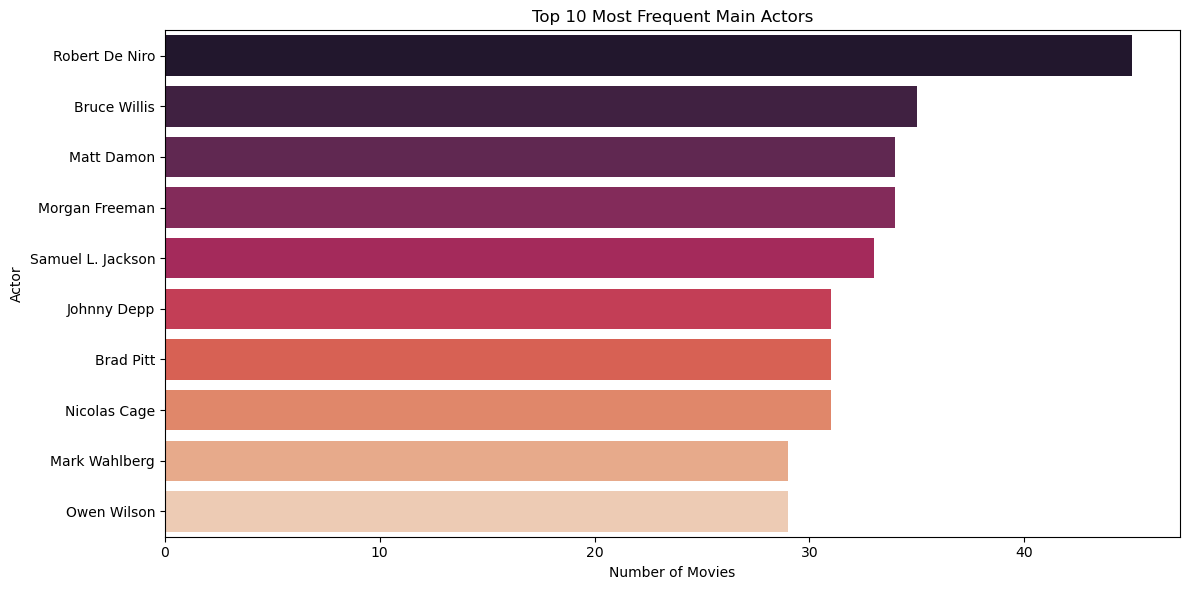

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_actors, x='Movie_Count', y='Actor', palette='rocket')
plt.title("Top 10 Most Frequent Main Actors")
plt.xlabel("Number of Movies")
plt.tight_layout()
plt.show()